In [1]:
%pip install treform
# download https://github.com/aria1th/treform/blob/main/examples/ExampleManager.py as
#https://raw.githubusercontent.com/aria1th/treform/main/examples/ExampleManager.py
!wget https://raw.githubusercontent.com/aria1th/treform/main/examples/ExampleManager.py
# download https://github.com/aria1th/treform/blob/main/examples/test_document_clustering.py



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
--2023-05-10 02:31:51--  https://raw.githubusercontent.com/aria1th/treform/main/examples/ExampleManager.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4017 (3.9K) [text/plain]
Saving to: ‘ExampleManager.py.3’

ExampleManager.py.3 100%[===================>]   3.92K  --.-KB/s    in 0s      

2023-05-10 02:31:51 (36.6 MB/s) - ‘ExampleManager.py.3’ saved [4017/4017]



In [2]:
from ExampleManager import PathManager

log_path: None
error_log_path: None
log level: INFO
NumExpr defaulting to 4 threads.


In [3]:

import treform as ptm
from treform.document_clustering.documentclustering import DocumentClustering


In [4]:
corpus = ptm.CorpusFromFieldDelimitedFile(str(PathManager('../sample_data/donald.txt')), 2)

In [5]:
import os
os.path.exists(str(PathManager('../stopwords/stopwordsKor.txt')))

parsing repo path


True

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
pipeline = ptm.Pipeline(ptm.splitter.NLTK(),
                        ptm.tokenizer.Komoran(),
                        ptm.helper.POSFilter('NN*'),
                        ptm.helper.SelectWordOnly(),
                        #ptm.ngram.NGramTokenizer(2, 2),
                        ptm.helper.StopwordFilter(file=str(PathManager('../stopwords/stopwordsKor.txt'))),
                        )


parsing repo path


In [8]:
result = pipeline.processCorpus(corpus)
print('==  ==')


==  ==


In [9]:

documents = []
for doc in result:
    document = ''
    for sent in doc:
        document += " ".join(sent)
    documents.append(document)


In [10]:

print(len(documents))
#name either k-means, agglo, spectral_cocluster
name = 'k-means'
clustering=DocumentClustering(k=5)


120


In [11]:

#n_components means the number of words to be used as features
clustering.make_matrix(documents,n_components=-1,doc2vec_matrix=None)


In [12]:

clustering.cluster(name)


cluster_name k-means
cluster_name: k-means
Clustering sparse data with KMeans(max_iter=500, n_clusters=5, n_init=1)
done in 0.046s



k-means
2 -- 0
1 -- 1
2 -- 2
1 -- 3
1 -- 4
1 -- 5
2 -- 6
1 -- 7
1 -- 8
2 -- 9
1 -- 10
1 -- 11
2 -- 12
2 -- 13
1 -- 14
2 -- 15
1 -- 16
0 -- 17
1 -- 18
3 -- 19
3 -- 20
1 -- 21
3 -- 22
0 -- 23
1 -- 24
1 -- 25
0 -- 26
2 -- 27
1 -- 28
2 -- 29
3 -- 30
1 -- 31
0 -- 32
1 -- 33
1 -- 34
1 -- 35
2 -- 36
1 -- 37
1 -- 38
2 -- 39
3 -- 40
1 -- 41
1 -- 42
4 -- 43
4 -- 44
2 -- 45
1 -- 46
1 -- 47
1 -- 48
1 -- 49
4 -- 50
1 -- 51
4 -- 52
1 -- 53
4 -- 54
1 -- 55
0 -- 56
2 -- 57
3 -- 58
0 -- 59
4 -- 60
1 -- 61
1 -- 62
1 -- 63
2 -- 64
1 -- 65
1 -- 66
1 -- 67
1 -- 68
4 -- 69
2 -- 70
1 -- 71
1 -- 72
1 -- 73
2 -- 74
2 -- 75
1 -- 76
1 -- 77
4 -- 78
4 -- 79
0 -- 80
3 -- 81
1 -- 82
1 -- 83
4 -- 84
1 -- 85
1 -- 86
3 -- 87
3 -- 88
3 -- 89
1 -- 90
1 -- 91
1 -- 92
0 -- 93
2 -- 94
1 -- 95
3 -- 96
3 -- 97
3 -- 98
1 -- 99
3 -- 100
1 -- 101
1 -- 102
0 -- 103
2 -- 104
2 -- 105
4 -- 106
1 -- 107
1 -- 108
0 -- 109
1 -- 110
0 -- 111
0 -- 112
2 -- 113
2 -- 114
2 -- 115
2 -- 116
3 -- 117
1 -- 118
1 -- 119
Cluster 0: 강경경화 동의 대한민

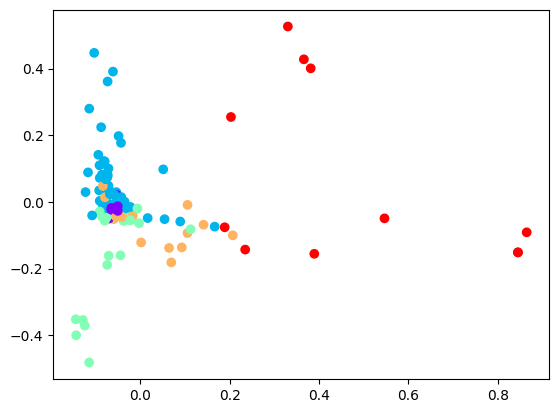

In [13]:
clustering.print_results()

clustering.visualize()